In [3]:
!where python

C:\Users\daani\Anaconda3\python.exe
C:\Users\daani\AppData\Local\Microsoft\WindowsApps\python.exe


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
#Standard imports
import os
import sys
sys.path.append('..')

#Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Local imports
from src.localpaths import RAW_DATA_PATH, X_TEST_RAW_PATH, Y_TEST_RAW_PATH
from src.data.make_dataset import load_training_data
from src.data.make_dataset import load_test_data

In [6]:
pd.set_option('display.max_columns', 100)

# Load Data

In [7]:
ls ..

 Volume in drive C is OS
 Volume Serial Number is 44B4-9256

 Directory of C:\Users\daani\churn-model

04/02/2020  03:36 PM    <DIR>          .
04/02/2020  03:36 PM    <DIR>          ..
04/02/2020  03:37 PM             1,090 .gitignore
04/02/2020  03:18 PM    <DIR>          data
04/02/2020  02:23 PM    <DIR>          env
04/02/2020  03:19 PM    <DIR>          models
04/05/2020  09:33 PM    <DIR>          notebooks
04/02/2020  01:26 PM                13 README.md
04/04/2020  12:09 PM    <DIR>          src
               2 File(s)          1,103 bytes
               7 Dir(s)  66,032,996,352 bytes free


In [8]:
df = pd.read_csv(RAW_DATA_PATH)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

**TotalCharges needs more research:** It looks like TotalCharges is an object data type even though it should be a float

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C940A4128>,
      dtype=object)

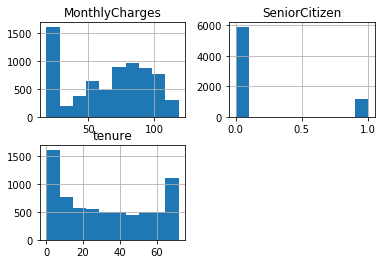

In [14]:
df.hist()

In [15]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
df.shape

(7043, 21)

In [17]:
(df['Churn'].value_counts()/df.shape[0]).round(2)

No     0.73
Yes    0.27
Name: Churn, dtype: float64

# Load training data

In [18]:
X_train, y_train = load_training_data(clean=True)

In [19]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525.00
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70


In [20]:
y_train.head()

,Churn
0,Yes
1,No
2,No
3,No
4,Yes


In [21]:
X_test=pd.read_csv(X_TEST_RAW_PATH)

In [22]:
y_test=pd.read_csv(Y_TEST_RAW_PATH)

In [23]:
X_test.shape

(1761, 20)

In [24]:
y_test.shape

(1761, 1)

# Basic EDA - distributions of features

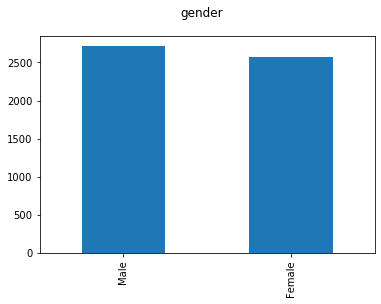

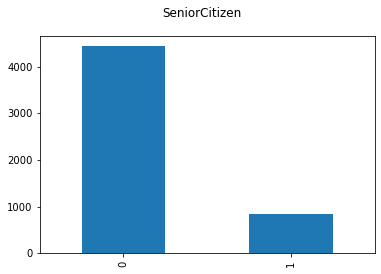

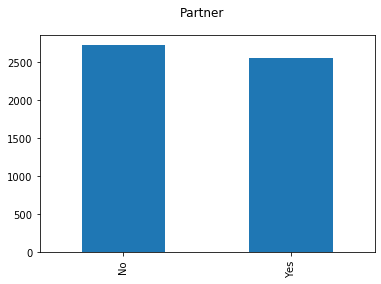

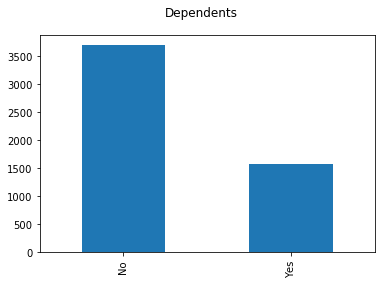

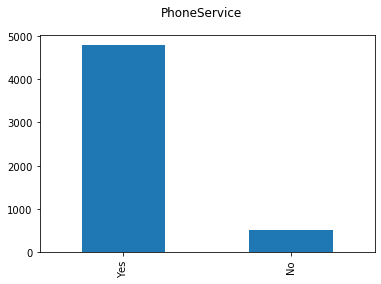

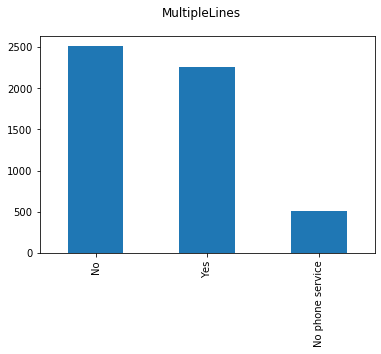

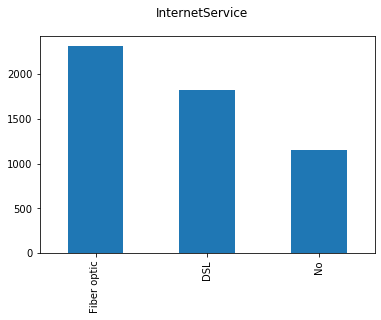

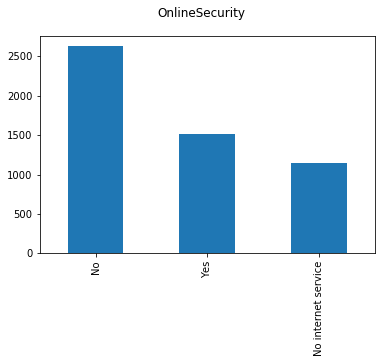

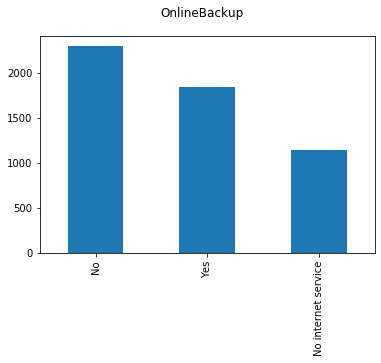

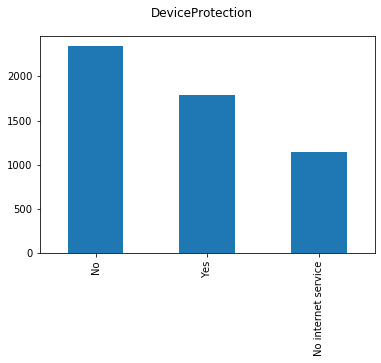

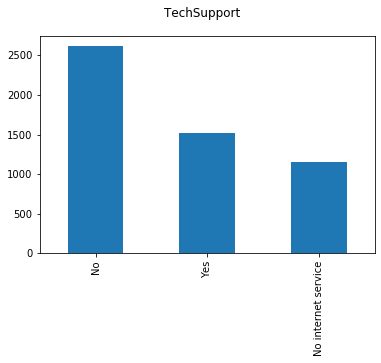

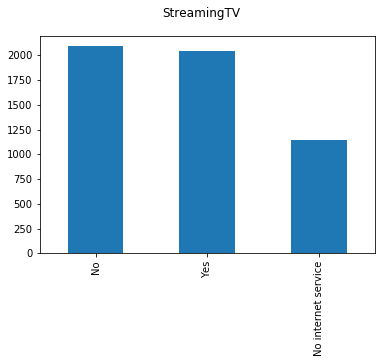

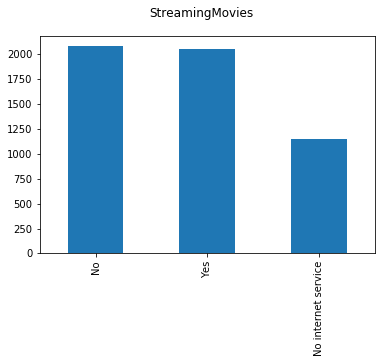

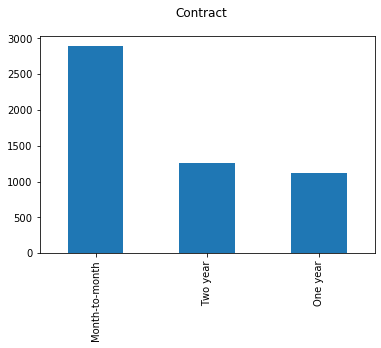

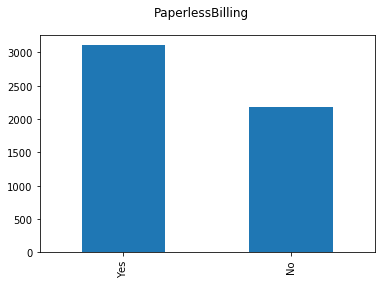

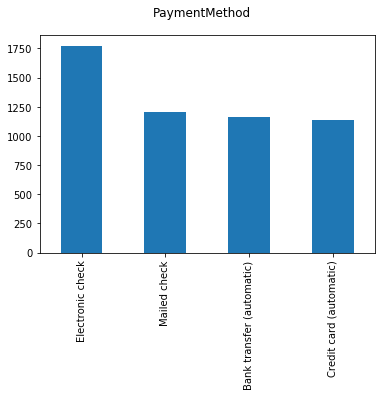

In [25]:
for col in X_train.columns:
    if len(X_train[col].unique()) <= 4:
        X_train[col].value_counts().plot(kind='bar')
        plt.suptitle(col)
        plt.show()

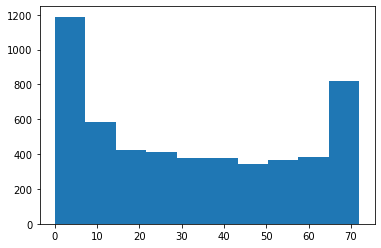

In [26]:
X_train['tenure'].hist(grid=False)

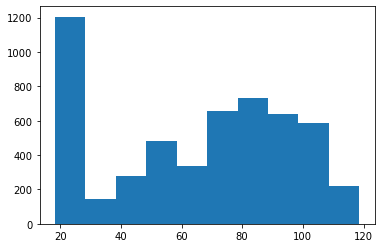

In [27]:
X_train['MonthlyCharges'].hist(grid=False)

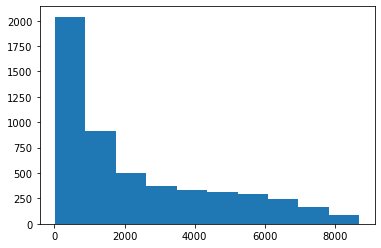

In [28]:
X_train['TotalCharges'].hist(grid=False)

# Inspect TotalCharges

In [29]:
bad_values = set()
for val in X_train['TotalCharges'].unique():
    try:
        float(val)
    except:
        bad_values.add(val)

In [30]:
(X_train['TotalCharges'] == ' ').sum()

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

In [31]:
total_charges = X_train[X_train['TotalCharges'] != ' ']['TotalCharges'].map(float)

In [32]:
total_charges.describe()

count    5282.000000
mean     2287.241073
std      2268.752161
min        18.800000
25%       400.500000
50%      1397.475000
75%      3814.250000
max      8684.800000
Name: TotalCharges, dtype: float64

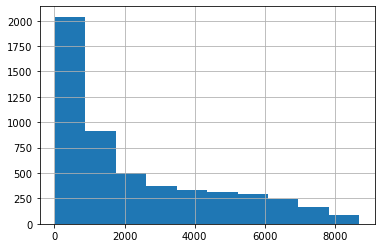

In [33]:
total_charges.hist()

In [34]:
X_train[X_train['TotalCharges'] == ' '].index

Int64Index([], dtype='int64')

In [35]:
bad_values_idxs = X_train[X_train['TotalCharges']== ' '].index
X_train.loc[bad_values_idxs, 'TotalCharges'] = 20
X_train['TotalCharges']=X_train['TotalCharges'].astype(float)

In [36]:
X_train['TotalCharges'].head()

0      25.30
1     525.00
2      85.50
3    2215.25
4     270.70
Name: TotalCharges, dtype: float64

# Load featurized data

In [40]:
X_train, y_train = load_training_data(final=True)

In [41]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,25.30,25.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,1,75.15,525.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,1,20.05,85.50,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,76.00,2215.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,75.10,270.70,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
gender,1.000000,0.005691,0.010143,-0.011058,-0.001318,0.009706,0.014090,0.018822,0.007934
SeniorCitizen,0.005691,1.000000,0.016648,-0.211271,0.006169,0.000581,0.156417,0.219945,0.093900
Partner,0.010143,0.016648,1.000000,0.447629,0.382443,0.031578,-0.020634,0.105603,0.324533
Dependents,-0.011058,-0.211271,0.447629,1.000000,0.162921,-0.005830,-0.109935,-0.114920,0.063421
tenure,-0.001318,0.006169,0.382443,0.162921,1.000000,0.005917,0.004055,0.253618,0.827555
PhoneService,0.009706,0.000581,0.031578,-0.005830,0.005917,1.000000,0.014489,0.247419,0.113558
PaperlessBilling,0.014090,0.156417,-0.020634,-0.109935,0.004055,0.014489,1.000000,0.359566,0.163911
MonthlyCharges,0.018822,0.219945,0.105603,-0.114920,0.253618,0.247419,0.359566,1.000000,0.654344
TotalCharges,0.007934,0.093900,0.324533,0.063421,0.827555,0.113558,0.163911,0.654344,1.000000
